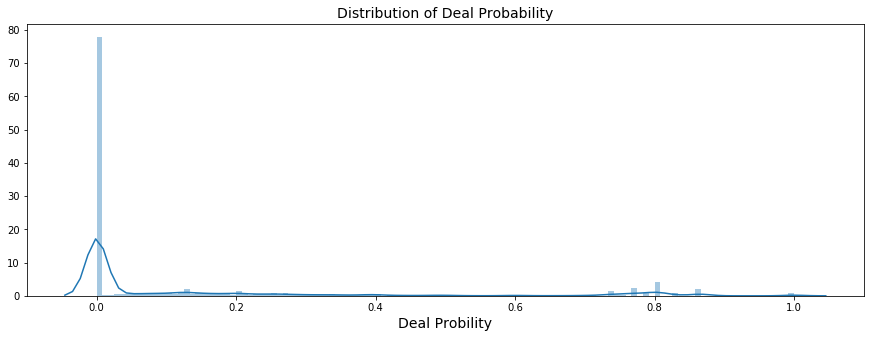

In [16]:
plt.figure(figsize=(15,5))
sns.distplot(train_df["deal_probability"].values, bins=120)
plt.xlabel('Deal Probility', fontsize=14)
plt.title("Distribution of Deal Probability", fontsize=14)
plt.show()

**Result**  
1. From the deal probability distribution plot, it is clear that most of the items have exteremely low deal probability, about 78%, while very few values have the deal probability of 0.7 or larger.  
2. A very small tower is observed near the deal probability of 1.0, indicating that there are some items in the dataset having very high value of deal probability.  



In [17]:
temp_series = train_df['region_en'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='Region distribution',width=900,height=900)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="region")

**The regions have percentage of ads between 1.71% to 9.41%. So the top regions are:**
1. Krasnodar region - 9.41%
2. Sverdlovsk region - 6.28%
3. Rostov region - 5.99%


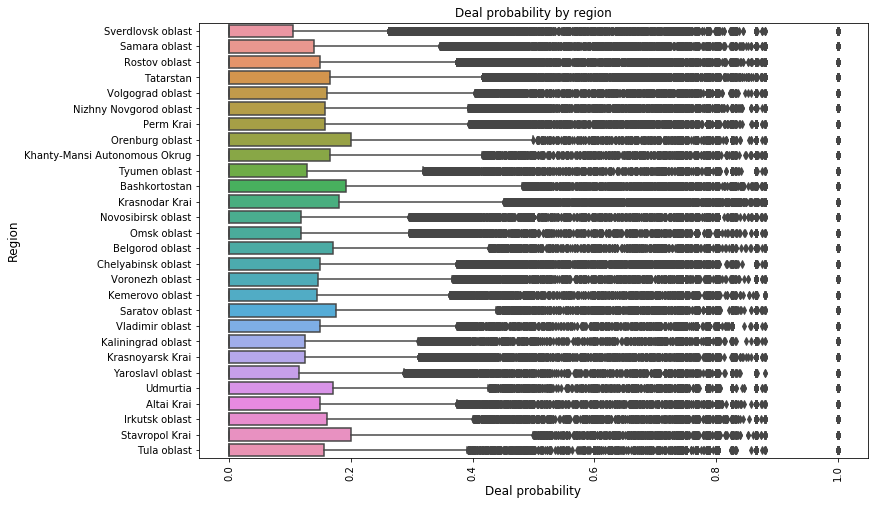

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(y="region_en", x="deal_probability", data=train_df)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title("Deal probability by region")
plt.xticks(rotation='vertical')
plt.show()

In [20]:
temp_series = train_df['parent_category_name_en'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='Parent Category distribution',width=900,height=900)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="parentcategory")

46.4% of the ads are for Personal belongings, 11.9% are for home and garden and 11.5% for consumer electronics.

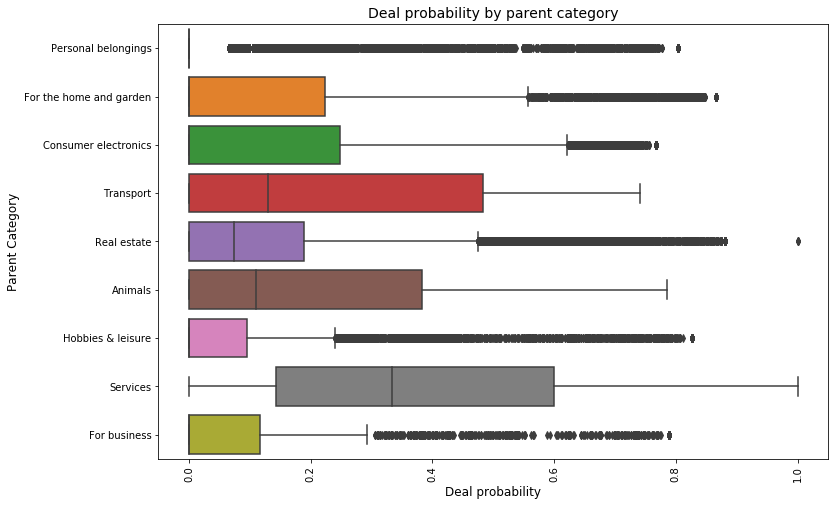

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x="deal_probability",y="parent_category_name_en" , data=train_df)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('Parent Category', fontsize=12)
plt.title("Deal probability by parent category", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

Services category seems to have slightly higher deal probability compared to others.

In [22]:
temp_series = train_df['user_type'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='User Type distribution',width=600,height=600)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

Private users take about 72% of the data followed by company and shop.

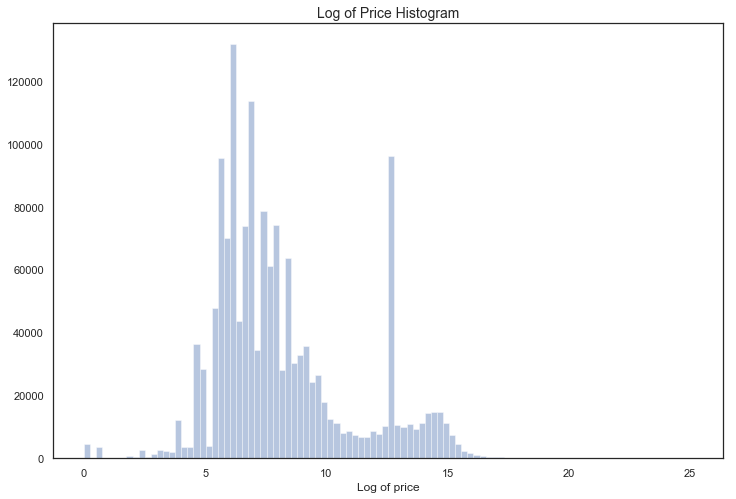

In [30]:
train_df["price_new"] = train_df["price"].values
train_df["price_new"].fillna(np.nanmean(train_df["price"].values), inplace=True)

plt.figure(figsize=(12,8))
sns.distplot(np.log1p(train_df["price_new"].values), bins=100, kde=False)
plt.xlabel('Log of price', fontsize=12)
plt.title("Log of Price Histogram", fontsize=14)
plt.show()

In [25]:
def _generate_bar_plot_ver(df, col, title, color, w=None, h=None, lm=0, limit=100, need_trace = False):
    cnt_srs = df[col].value_counts()[:limit]
    trace = go.Bar(x=list(cnt_srs.index), y=list(cnt_srs.values),
        marker=dict(color = color))
    if need_trace:
        return trace
    if w != None and h != None:
        layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    else:
        layout = dict(title=title, margin=dict(l=lm))
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
trace1 = _generate_bar_plot_ver(train_df, "title_len", "Title Length", '#f7a92c', 700, 400, 200, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train_df, "description_len", "Description Length", '#f7a92c', 700, 400, 200, limit=30, need_trace = True)

fig = tls.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Title Word Count','Description Word Count'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=400, title='', showlegend=False);
py.iplot(fig); 

1. Items present in the dataset have a range of 1 to 10 words in the title, with title having 2 words in them have the highest number.
2. The length of description with range from 0 to 25 is most common. And a large number of items with no description are present in the dataset.
3. Items having description containing 6 words are highest.

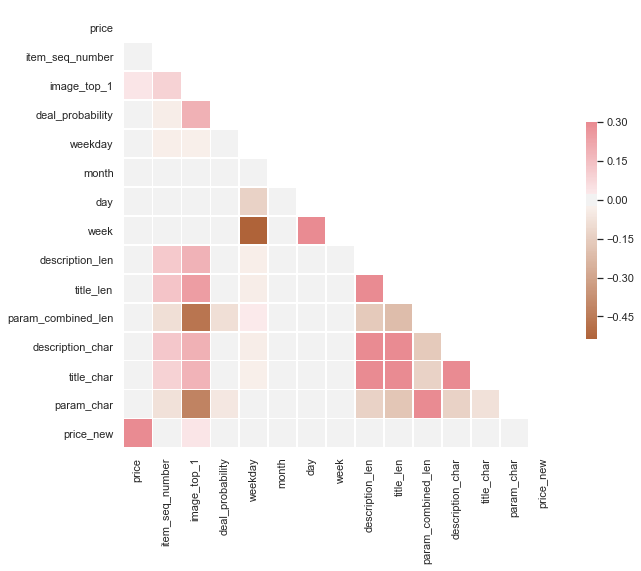

In [43]:
corr = train_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(30, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5});

1. From the correlation relationship, Deal probability shows good correlation with image_top_1 and title len. These may by important features while modelling.
2. Item Seq Number is also correlated mildly with title len, description len, and Image Top 1

In [28]:
cols = ['parent_category_name_en','deal_class_2']
colmap = sns.light_palette("#ff4284", as_cmap=True)
pd.crosstab(train_df[cols[0]], train_df[cols[1]]).style.background_gradient(cmap = colmap)

deal_class_2,0-0.1,0.1-0.2,0.2-0.3,0.3-0.4,0.4-0.5,0.5-0.6,0.6-0.7,0.7-0.8,0.8-0.9,0.9-1.0
parent_category_name_en,,,,,,,,,,
Animals,25379,5269,4511,7040,876,134,194,9067,0,0
Consumer electronics,111770,13321,9931,7681,1653,442,585,27625,0,0
For business,13325,1870,1078,119,115,120,53,1395,0,0
For the home and garden,118028,13115,9330,9063,1790,216,446,568,26267,0
Hobbies & leisure,64808,5436,3626,1868,660,143,193,243,9034,0
Personal belongings,579607,41554,21169,4110,1357,554,1073,787,47412,0
Real estate,89557,26407,15823,6078,4165,2095,1793,6258,1009,5
Services,15235,11190,5434,7592,4531,4347,408,5277,300,10071
Transport,37052,7982,5907,4479,4779,1077,837,17726,0,0


1. A large number of Consumer Electronics items have high deal probabiliy (0.7 - 0.8), Personal Belongings category which dominates the dataset also contains higher number of items having deal probability close to 1.0
2. Home and Garden related category also contains items having high deal probability.
3. Only services category has the items having deal probability greater than 0.9
4. After model filter can be built based on this.